___
## Objective

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

___

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
app_data = pd.read_csv("application_data.csv")

In [3]:
prev_app = pd.read_csv("previous_application.csv")

#### viewing app_data

In [4]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### viewing prev_app

In [5]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Data Cleaning

<h3 style=color:brown> Investigating application_data </h3>

#### info about app_data

In [6]:
app_data.info(-1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

#### Dimensions of app_data

In [7]:
app_data.shape

(307511, 122)

**Looking for duplicate data**

In [8]:
app_data.duplicated().sum()

0

**looking at the columns with more than 45% missing values**

In [9]:
for i in app_data.columns:
    if (round(100*(app_data[i].isnull().sum()/len(app_data.isnull())),2) >= 45):
        print(i,': ',(round(100*(app_data[i].isnull().sum()/len(app_data.isnull())),2)),'%')

OWN_CAR_AGE :  65.99 %
EXT_SOURCE_1 :  56.38 %
APARTMENTS_AVG :  50.75 %
BASEMENTAREA_AVG :  58.52 %
YEARS_BEGINEXPLUATATION_AVG :  48.78 %
YEARS_BUILD_AVG :  66.5 %
COMMONAREA_AVG :  69.87 %
ELEVATORS_AVG :  53.3 %
ENTRANCES_AVG :  50.35 %
FLOORSMAX_AVG :  49.76 %
FLOORSMIN_AVG :  67.85 %
LANDAREA_AVG :  59.38 %
LIVINGAPARTMENTS_AVG :  68.35 %
LIVINGAREA_AVG :  50.19 %
NONLIVINGAPARTMENTS_AVG :  69.43 %
NONLIVINGAREA_AVG :  55.18 %
APARTMENTS_MODE :  50.75 %
BASEMENTAREA_MODE :  58.52 %
YEARS_BEGINEXPLUATATION_MODE :  48.78 %
YEARS_BUILD_MODE :  66.5 %
COMMONAREA_MODE :  69.87 %
ELEVATORS_MODE :  53.3 %
ENTRANCES_MODE :  50.35 %
FLOORSMAX_MODE :  49.76 %
FLOORSMIN_MODE :  67.85 %
LANDAREA_MODE :  59.38 %
LIVINGAPARTMENTS_MODE :  68.35 %
LIVINGAREA_MODE :  50.19 %
NONLIVINGAPARTMENTS_MODE :  69.43 %
NONLIVINGAREA_MODE :  55.18 %
APARTMENTS_MEDI :  50.75 %
BASEMENTAREA_MEDI :  58.52 %
YEARS_BEGINEXPLUATATION_MEDI :  48.78 %
YEARS_BUILD_MEDI :  66.5 %
COMMONAREA_MEDI :  69.87 %
ELEVATORS

#### dropping above and irrelevant columns from app_data

In [10]:
app_data.drop(['DAYS_REGISTRATION','DAYS_ID_PUBLISH','OWN_CAR_AGE','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
              'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
              'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY',
              'EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
              'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG',
              'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE',
              'BASEMENTAREA_MODE','YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE',
              'ENTRANCES_MODE','FLOORSMAX_MODE','FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE',
              'NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE','APARTMENTS_MEDI','BASEMENTAREA_MEDI',
              'YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI','ENTRANCES_MEDI',
              'FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
              'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE',
              'WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
              'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','FLAG_DOCUMENT_2',
              'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8',
              'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
              'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20',
              'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
              'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','FLAG_PHONE','FLAG_EMAIL'],
              axis=1, inplace=True)

#### new dimension after dropping columns

In [11]:
app_data.shape

(307511, 25)

In [12]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

- **Numerical Data:** TARGET, CNT_CHILDREN, DAYS_BIRTH, DAYS_EMPLOYED, CNT_FAM_MEMBERS, AMT_INCOME_TOTAL, AMT_CREDIT,  AMT_ANNUITY, AMT_GOODS_PRICE
     
     
- **Categorical Data:** NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_TYPE_SUITE,       NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, OCCUPATION_TYPE, ORGANIZATION_TYPE

#### looking for null data in app_data

In [13]:
app_data.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
FLAG_CONT_MOBILE                   0
OCCUPATION_TYPE                96391
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
ORGANIZATION_TYPE                  0
dtype: int64

In [14]:
# Checking for any duplicate data
app_data.duplicated().sum()

0

In [15]:
# looking null values in target variable
app_data['TARGET'].isnull().sum()

0

#### handling missing values in CNT_FAM_MEMBERS

In [16]:
app_data['CNT_FAM_MEMBERS'].isnull().sum()

2

In [17]:
# percentage of missing values in CNT_FAM_MEMBERS
app_data.shape
(2/307511)*100

0.0006503832383231819

- since missing percentage is too small, thus dropping the records will not affect our analysis

In [18]:
# dropping missing records
app_data = app_data[~app_data['CNT_FAM_MEMBERS'].isnull()].copy()

In [19]:
# checking for missing records
app_data['CNT_FAM_MEMBERS'].isnull().sum()

0

In [20]:
# looking at new dimension
app_data.shape

(307509, 25)

In [21]:
# changing data type to integer
app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].astype('int')

CNT_FAM_MEMBERS changed to **integer** type

#### handling missing values in AMT_ANNUITY       

In [22]:
app_data['AMT_ANNUITY'].isnull().sum()

12

In [23]:
# dimensions
app_data.shape

(307509, 25)

In [24]:
#percentage of missing value

(12/307509)*100

0.0039023248100055604

- Since the percentage value is too low the data can be dropped

In [25]:
# dropping the missing data

app_data = app_data[~app_data['AMT_ANNUITY'].isnull()].copy()

In [26]:
# checking for missing value 

app_data['AMT_ANNUITY'].isnull().sum()

0

In [27]:
# new dimensions
app_data.shape

(307497, 25)

#### handling missing values in AMT_GOODS_PRICE

In [28]:
app_data['AMT_GOODS_PRICE'].isnull().sum()

276

In [29]:
# percentage of missing values
(276/307497)*100

0.0897569732387633

- dropping the records would be best because the percentage is small and also it shows the price of the goods for which the loan is given so any assumption will not benefit in analysis.

In [30]:
# dropping missing records
app_data = app_data[~app_data['AMT_GOODS_PRICE'].isnull()].copy()

In [31]:
# new dimensions
app_data.shape

(307221, 25)

#### handling missing values in NAME_TYPE_SUITE

In [32]:
app_data['NAME_TYPE_SUITE'].isnull().sum()

1014

In [33]:
app_data.shape

(307221, 25)

In [34]:
# percentage of missing value
(1014/307221)*100
#app_data.NAME_TYPE_SUITE.mode()

0.3300555626080249

In [35]:
# dropping the missing records
app_data = app_data[~app_data['NAME_TYPE_SUITE'].isnull()]

In [36]:
# new dimensions
app_data.shape

(306207, 25)

#### looking at the percentage of missing value for each column in app_data

In [37]:
(app_data.isnull().sum())/306207*100

SK_ID_CURR                      0.0000
TARGET                          0.0000
NAME_CONTRACT_TYPE              0.0000
CODE_GENDER                     0.0000
FLAG_OWN_CAR                    0.0000
FLAG_OWN_REALTY                 0.0000
CNT_CHILDREN                    0.0000
AMT_INCOME_TOTAL                0.0000
AMT_CREDIT                      0.0000
AMT_ANNUITY                     0.0000
AMT_GOODS_PRICE                 0.0000
NAME_TYPE_SUITE                 0.0000
NAME_INCOME_TYPE                0.0000
NAME_EDUCATION_TYPE             0.0000
NAME_FAMILY_STATUS              0.0000
NAME_HOUSING_TYPE               0.0000
REGION_POPULATION_RELATIVE      0.0000
DAYS_BIRTH                      0.0000
DAYS_EMPLOYED                   0.0000
FLAG_CONT_MOBILE                0.0000
OCCUPATION_TYPE                31.3533
CNT_FAM_MEMBERS                 0.0000
REGION_RATING_CLIENT            0.0000
REGION_RATING_CLIENT_W_CITY     0.0000
ORGANIZATION_TYPE               0.0000
dtype: float64

#### handling missing values in OCCUPATION_TYPE column

In [38]:
app_data['OCCUPATION_TYPE'].isnull().sum()

96006

- Since the missing data is large enough so it can be dropped but this would mean loosing other important info also so dropping would not be a wise decision.
- In this case we'll be replacing nan value with **missing**

In [39]:
app_data['OCCUPATION_TYPE'] = app_data['OCCUPATION_TYPE'].replace(np.nan,"Missing")

#### looking for missing values in app_data

In [40]:
app_data.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
FLAG_CONT_MOBILE               0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
dtype: int64

## Fixing  columns / Outliers

**NAME_EDUCATION_TYPE column**

In [41]:
app_data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    217581
Higher education                  74413
Incomplete higher                 10241
Lower secondary                    3809
Academic degree                     163
Name: NAME_EDUCATION_TYPE, dtype: int64

In [42]:
# replacing the name 'Secondary / secondary special' with 'Secondary education'in NAME_EDUCATION_TYPE column

app_data['NAME_EDUCATION_TYPE'] = app_data['NAME_EDUCATION_TYPE'].replace('Secondary / secondary special','Secondary education')

In [43]:
app_data['NAME_EDUCATION_TYPE'].value_counts()

Secondary education    217581
Higher education        74413
Incomplete higher       10241
Lower secondary          3809
Academic degree           163
Name: NAME_EDUCATION_TYPE, dtype: int64

**NAME_FAMILY_STATUS column**

In [44]:
app_data['NAME_FAMILY_STATUS'].value_counts()

Married                 195641
Single / not married     45197
Civil marriage           29659
Separated                19695
Widow                    16015
Name: NAME_FAMILY_STATUS, dtype: int64

In [45]:
# replacing the name 'Single / not married ' with 'Single' in NAME_FAMILY_STATUS column

app_data['NAME_FAMILY_STATUS'] = app_data['NAME_FAMILY_STATUS'].replace('Single / not married','Single')

In [46]:
app_data['NAME_FAMILY_STATUS'].value_counts()

Married           195641
Single             45197
Civil marriage     29659
Separated          19695
Widow              16015
Name: NAME_FAMILY_STATUS, dtype: int64

**DAYS_BIRTH column**

In [47]:
app_data['DAYS_BIRTH'].value_counts()

-13749    42
-13481    42
-10020    41
-18248    41
-15771    40
          ..
-24812     1
-7997      1
-25029     1
-25139     1
-7853      1
Name: DAYS_BIRTH, Length: 17458, dtype: int64

In [48]:
# data type of DAYS_BIRTH column

app_data['DAYS_BIRTH'].dtype

dtype('int64')

In [49]:
# converting to string variable

app_data['DAYS_BIRTH'] = app_data['DAYS_BIRTH'].astype('str')

- Converted to string type because integer objects cannot be indexed, in order to remove the special charactrer '-' from the values conversion into string variable was necessary.

In [50]:
app_data['DAYS_BIRTH'].dtype

dtype('O')

In [51]:
#convert back to integer , storing in new column AGE and dividing by 365 to get age in years

app_data['AGE'] = app_data['DAYS_BIRTH'].apply(lambda x: 0 if x=='0' else int(x[1:])//365)

In [52]:
app_data['AGE'].value_counts()

38    8825
37    8759
39    8736
40    8585
36    8579
41    8418
27    8413
31    8344
43    8283
42    8188
28    7930
32    7873
44    7788
35    7763
30    7759
33    7674
29    7624
34    7595
54    7525
53    7432
46    7265
45    7188
47    6992
48    6965
56    6811
57    6747
52    6746
51    6664
55    6617
59    6615
49    6603
50    6453
58    6243
60    6209
62    5501
61    5400
63    5180
64    5098
26    4527
25    4142
23    4032
24    3881
65    3091
22    2925
66    2076
67    2033
21    1241
68     852
69      16
20       1
Name: AGE, dtype: int64

In [53]:
app_data['AGE'].describe()

count    306207.000000
mean         43.445940
std          11.951545
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: AGE, dtype: float64

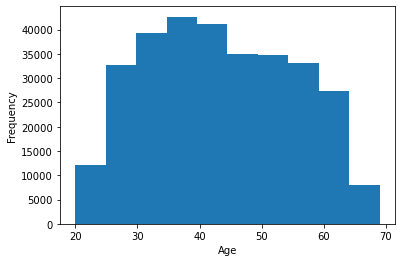

In [54]:
app_data.AGE.plot.hist()
plt.xlabel('Age')
plt.show()

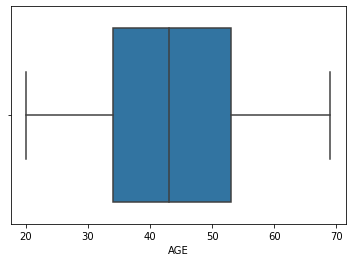

In [55]:
sns.boxplot(app_data['AGE'])
plt.show()

# data seems to be fine

**DAYS_EMPLOYED column**

In [56]:
app_data['DAYS_EMPLOYED'].dtype

dtype('int64')

In [57]:
# convert to string type

app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].astype('str')

- Converted to string variable because int objects cannot be indexed, in order to remove the special charactrer '-' from the values conversion into string variable was necessary.

In [58]:
app_data['DAYS_EMPLOYED'].dtype

dtype('O')

In [59]:
app_data['DAYS_EMPLOYED'].value_counts()

365243    55178
-200        154
-199        150
-224        150
-230        148
          ...  
-12829        1
-10           1
-14311        1
-10493        1
-11687        1
Name: DAYS_EMPLOYED, Length: 12566, dtype: int64

In [60]:
# converting back to integer, storing in new column YEARS_EMPLOYED and dividing by 365 to get days in years

app_data['YEARS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].apply(lambda x: 0 if x=='0' else int(x[1:])//365)

In [61]:
app_data['YEARS_EMPLOYED'].describe()

count    306207.000000
mean         37.027168
std          66.348220
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max         178.000000
Name: YEARS_EMPLOYED, dtype: float64

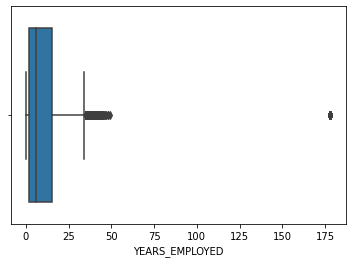

In [62]:
sns.boxplot(app_data['YEARS_EMPLOYED'])
plt.show()

In [63]:
app_data['YEARS_EMPLOYED'].quantile([.5,.7,.8,.85,.9,.95,.99])

0.50      6.0
0.70     12.0
0.80     25.0
0.85    178.0
0.90    178.0
0.95    178.0
0.99    178.0
Name: YEARS_EMPLOYED, dtype: float64

- As we can see the number of years for which client is employed is a large as 178 years which is impossibe. Assume if a person is employed at the age of 21 and retire at the age of 60 the max number of years he/she can work is 39 years so any value beyond that could be an outlier for us.
- We'll stick with binning, quantile, median for the analysis of this column

**CNT_CHILDREN column**

In [64]:
app_data['CNT_CHILDREN'].value_counts()

0     214463
1      60855
2      26639
3       3697
4        427
5         84
6         21
7          7
14         3
8          2
9          2
10         2
12         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64

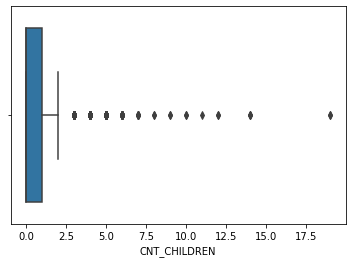

In [65]:
# plotting boxplot for outliers

sns.boxplot(app_data['CNT_CHILDREN'])
plt.show()

In [66]:
app_data['CNT_CHILDREN'].quantile([.5,.7,.8,.9,.95,0.99])

0.50    0.0
0.70    0.0
0.80    1.0
0.90    2.0
0.95    2.0
0.99    3.0
Name: CNT_CHILDREN, dtype: float64

- We can see that outliers are present in this data as the number of children a client have are as high as 19 which does not make any sense. Our data shows that 99% have 3 kids so for our analysis any value beyond 3 is an outlier for us.

**CNT_FAM_MEMBERS cloumn**

In [67]:
app_data['CNT_FAM_MEMBERS'].value_counts()

2     157739
1      67514
3      52368
4      24599
5       3459
6        407
7         81
8         20
9          6
10         3
12         2
14         2
16         2
20         2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

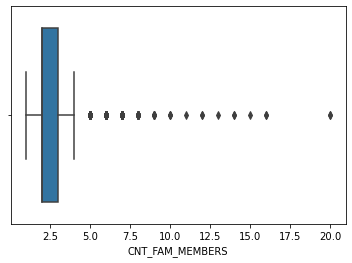

In [68]:
# looking for outlier using boxplot
sns.boxplot(app_data['CNT_FAM_MEMBERS'])
plt.show()

In [69]:
app_data['CNT_FAM_MEMBERS'].quantile([0.5,0.9,0.95,0.99])

0.50    2.0
0.90    3.0
0.95    4.0
0.99    5.0
Name: CNT_FAM_MEMBERS, dtype: float64

- The count of family members in this case is as large as 20 which is unusual for our data as 99% of the data shows family member as 5 but there is possibility of client living in a joint family so removing it is not an option.

In [70]:
app_data['CNT_FAM_MEMBERS'].describe()

count    306207.000000
mean          2.152802
std           0.910596
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

**NAME_CONTRACT_TYPE column**

In [71]:
app_data['NAME_CONTRACT_TYPE'].value_counts()

# no fixing required

Cash loans         277213
Revolving loans     28994
Name: NAME_CONTRACT_TYPE, dtype: int64

**CODE_GENDER column**

In [72]:
app_data['CODE_GENDER'].value_counts()

F      201635
M      104568
XNA         4
Name: CODE_GENDER, dtype: int64

In [73]:
# replacing xna with unknown
app_data['CODE_GENDER'] = app_data['CODE_GENDER'].replace('XNA','Unknown')


In [74]:
app_data['CODE_GENDER'].value_counts()

F          201635
M          104568
Unknown         4
Name: CODE_GENDER, dtype: int64

**FLAG_OWN_CAR column**

In [75]:
app_data['FLAG_OWN_CAR'].value_counts()

# no fixing required

N    202037
Y    104170
Name: FLAG_OWN_CAR, dtype: int64

**FLAG_OWN_REALTY column**

In [76]:
app_data['FLAG_OWN_REALTY'].value_counts()

# no fixing required

Y    212843
N     93364
Name: FLAG_OWN_REALTY, dtype: int64

**NAME_TYPE_SUITE column**

In [77]:
app_data['NAME_TYPE_SUITE'].value_counts()


Unaccompanied      248515
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [78]:
# replacing Spouse, partner with Spouse
# replacing Other_B , Other_A, Group of people with Others to simplify understanding

app_data['NAME_TYPE_SUITE'] = app_data['NAME_TYPE_SUITE'].replace('Spouse, partner','Spouse')
app_data['NAME_TYPE_SUITE'] = app_data['NAME_TYPE_SUITE'].replace(['Other_B','Other_A','Group of people'],'Others')

In [79]:
# replaced values
app_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied    248515
Family            40148
Spouse            11370
Children           3267
Others             2907
Name: NAME_TYPE_SUITE, dtype: int64

**NAME_HOUSING_TYPE column**

In [80]:
app_data['NAME_HOUSING_TYPE'].value_counts()
# no fixing required

House / apartment      271709
With parents            14774
Municipal apartment     11146
Rented apartment         4862
Office apartment         2603
Co-op apartment          1113
Name: NAME_HOUSING_TYPE, dtype: int64

**NAME_INCOME_TYPE column**

In [81]:
app_data['NAME_INCOME_TYPE'].value_counts()

# no fixing required

Working                 158126
Commercial associate     71254
Pensioner                55164
State servant            21609
Unemployed                  22
Student                     17
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

**OCCUPATION_TYPE column**

In [82]:
app_data['OCCUPATION_TYPE'].value_counts()

# no fixing required

Missing                  96006
Laborers                 54970
Sales staff              31957
Core staff               27426
Managers                 21275
Drivers                  18520
High skill tech staff    11326
Accountants               9768
Medicine staff            8504
Security staff            6694
Cooking staff             5929
Cleaning staff            4641
Private service staff     2637
Low-skill Laborers        2085
Waiters/barmen staff      1340
Secretaries               1300
Realty agents              748
HR staff                   559
IT staff                   522
Name: OCCUPATION_TYPE, dtype: int64

**ORGANIZATION_TYPE column**

In [83]:
app_data['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67683
XNA                       55178
Self-employed             38256
Other                     16621
Medicine                  11144
Business Entity Type 2    10509
Government                10356
School                     8856
Trade: type 7              7798
Kindergarten               6853
Construction               6692
Business Entity Type 1     5962
Transport: type 4          5374
Trade: type 3              3471
Industry: type 9           3345
Industry: type 3           3269
Security                   3228
Housing                    2941
Industry: type 11          2698
Military                   2621
Bank                       2484
Agriculture                2446
Police                     2331
Transport: type 2          2191
Postal                     2152
Security Ministries        1965
Trade: type 2              1887
Restaurant                 1800
Services                   1568
University                 1322
Industry: type 7           1301
Transpor

In [84]:
# replacing xna,other with others
app_data['ORGANIZATION_TYPE'] = app_data['ORGANIZATION_TYPE'].replace(['XNA','Other'],'Others')

In [85]:
app_data['ORGANIZATION_TYPE'].value_counts()

Others                    71799
Business Entity Type 3    67683
Self-employed             38256
Medicine                  11144
Business Entity Type 2    10509
Government                10356
School                     8856
Trade: type 7              7798
Kindergarten               6853
Construction               6692
Business Entity Type 1     5962
Transport: type 4          5374
Trade: type 3              3471
Industry: type 9           3345
Industry: type 3           3269
Security                   3228
Housing                    2941
Industry: type 11          2698
Military                   2621
Bank                       2484
Agriculture                2446
Police                     2331
Transport: type 2          2191
Postal                     2152
Security Ministries        1965
Trade: type 2              1887
Restaurant                 1800
Services                   1568
University                 1322
Industry: type 7           1301
Transport: type 3          1181
Industry

**AMT_INCOME_TOTAL column**

In [86]:
app_data['AMT_INCOME_TOTAL'].describe()

count    3.062070e+05
mean     1.687825e+05
std      2.375206e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.476000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

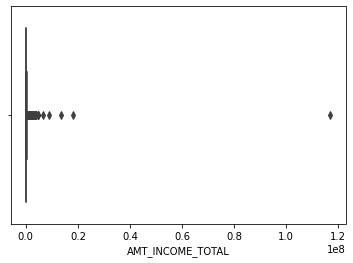

In [88]:
# outlier->boxplot
sns.boxplot(app_data['AMT_INCOME_TOTAL'])
plt.show()

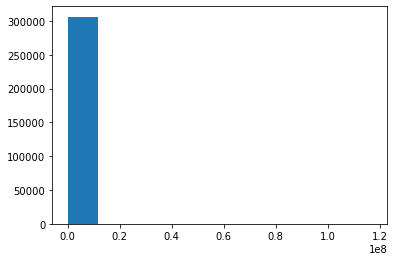

In [89]:
# outlier->histogram
plt.hist(app_data['AMT_INCOME_TOTAL'])
plt.show()

In [90]:
#looking ast quantile
app_data['AMT_INCOME_TOTAL'].quantile([0,.5,.9,0.95,0.99,1])

0.00        25650.0
0.50       147600.0
0.90       270000.0
0.95       337500.0
0.99       472500.0
1.00    117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

- As we can see the highest income of a client is more than 117million v/s the highest credit provided is close to 405K which means there is an outlier. Looking at the quantiles 99% of the income lies within 473K but there is possibility that a person is earning 117m so, for this particular data set anything beyond 473k will be treated as an outlier and removing it is not a good option.


- we'll use binning, median, quantile technique for the analysis of this particular variable

In [91]:
# outlier data
app_data[app_data['AMT_INCOME_TOTAL']>=437000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AGE,YEARS_EMPLOYED
22,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,...,-11146,-4306,1,Sales staff,3,3,2,Self-employed,30,11
51,100059,0,Cash loans,M,Y,Y,1,540000.0,675000.0,34596.0,...,-18632,-6977,1,Managers,3,2,2,Services,51,19
59,100070,0,Cash loans,M,Y,Y,0,540000.0,1227901.5,46899.0,...,-20544,-2091,1,Managers,1,1,1,Business Entity Type 3,56,5
142,100164,0,Cash loans,F,Y,N,1,450000.0,407434.5,43362.0,...,-16097,-2630,1,Core staff,3,3,3,Self-employed,44,7
280,100323,0,Cash loans,M,Y,Y,0,450000.0,1575000.0,55800.0,...,-18213,-2363,1,Managers,2,2,2,Business Entity Type 3,49,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307274,455991,0,Cash loans,M,Y,Y,2,450000.0,495000.0,36148.5,...,-13456,-3147,1,Managers,4,2,2,Self-employed,36,8
307440,456178,0,Cash loans,F,N,Y,0,440100.0,713889.0,45751.5,...,-18047,-1886,1,Managers,2,1,1,Business Entity Type 3,49,5
307451,456190,0,Cash loans,M,Y,N,1,450000.0,545040.0,25407.0,...,-11523,-2500,1,Core staff,3,2,2,Police,31,6
307484,456228,0,Cash loans,F,Y,N,0,540000.0,545040.0,35617.5,...,-12847,-328,1,Managers,2,1,1,Business Entity Type 3,35,0


### Data Imbalance check

In [92]:
app_data['TARGET'].value_counts(normalize=True)*100

0    91.9156
1     8.0844
Name: TARGET, dtype: float64

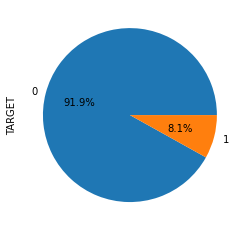

In [93]:
(app_data['TARGET'].value_counts(normalize=True)*100).plot.pie(autopct='%1.1f%%')
plt.show()

- We can see that around **8%** of the borrower have defaulted/ have payment difficulties or we can say that the non-defaulters are **11x+** compared to defaulters which is clearly an indication of data imbalance.

<h2 style=color:brown> Objective: </h2> 

- to find the **driving factors(driver variables)** behind loan default. 

### Univariate Analysis

#### Categorical

In [94]:
app_data.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                      object
DAYS_EMPLOYED                   object
FLAG_CONT_MOBILE                 int64
OCCUPATION_TYPE                 object
CNT_FAM_MEMBERS                  int32
REGION_RATING_CLIENT             int64
REGION_RATING_CLIENT_W_CITY      int64
ORGANIZATION_TYPE               object
AGE                      

**segmenting data**

In [95]:
app_1 = app_data[app_data['TARGET']==1]
app_0 = app_data[app_data['TARGET']==0]

In [96]:
app_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AGE,YEARS_EMPLOYED
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-9461,-637,1,Laborers,1,2,2,Business Entity Type 3,25,1
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,-18724,-2628,1,Cooking staff,1,3,2,Business Entity Type 3,51,7
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,-17482,-1262,1,Laborers,2,2,2,Business Entity Type 3,47,3
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,-13384,-3597,1,Sales staff,2,3,3,Self-employed,36,9
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,-24794,365243,1,Missing,2,2,2,Others,67,178


In [97]:
app_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_CONT_MOBILE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,AGE,YEARS_EMPLOYED
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-16765,-1188,1,Core staff,2,1,1,School,45,3
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-19046,-225,1,Laborers,1,2,2,Government,52,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-19005,-3039,1,Laborers,2,2,2,Business Entity Type 3,52,8
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-19932,-3038,1,Core staff,1,2,2,Religion,54,8
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,-16941,-1588,1,Laborers,2,2,2,Others,46,4


**NAME_EDUCATION_TYPE**

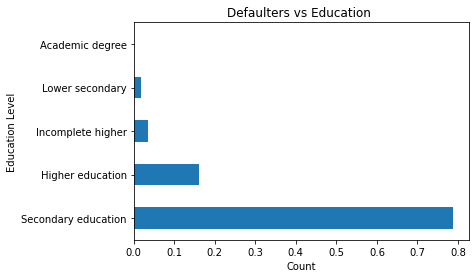

In [98]:
plt.title("Defaulters vs Education ")
app_1['NAME_EDUCATION_TYPE'].value_counts(normalize=True).plot.barh()
plt.xlabel('Count')
plt.ylabel('Education Level')

plt.show()

- The maximum number of clients who have defaulted had Secondary education followed by Higher education. May be clients with Secondary education are paid low. 

**OCCUPATION_TYPE**

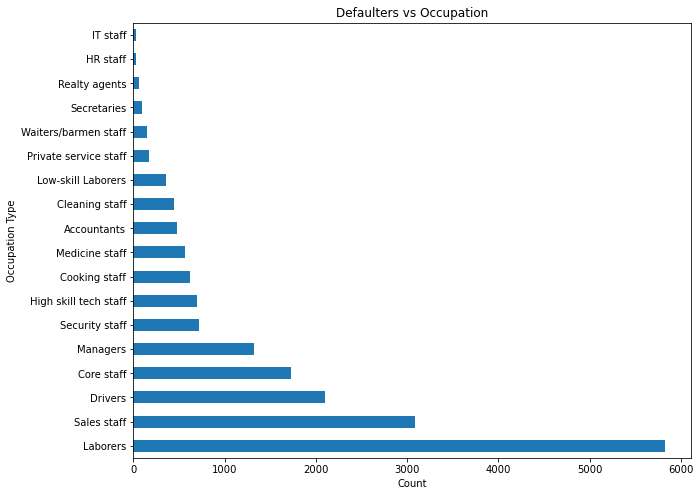

In [99]:
plt.figure(figsize=(10,8))
plt.title("Defaulters vs Occupation")
app_1[~(app_data.OCCUPATION_TYPE=='Missing')].OCCUPATION_TYPE.value_counts().plot.barh()
plt.xlabel("Count")
plt.ylabel("Occupation Type")
plt.show()


- Majority of the clients defaulted are Labourers by profession followed by Sales staff, least people belong to HR, may be HR employees are paid higher compared to other occupations

**NAME_CONTRACT_TYPE**

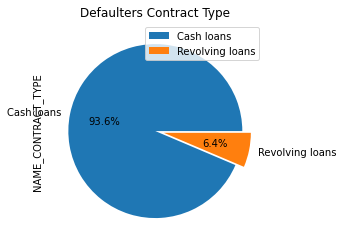

In [100]:
explode = (0,0.1)
app_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.pie(explode=explode, autopct='%1.1f%%')
plt.title('Defaulters Contract Type')
plt.legend()
plt.show()

- majority of defaulted clients opt/apply for cash loans

**ORGANIZATION_TYPE**

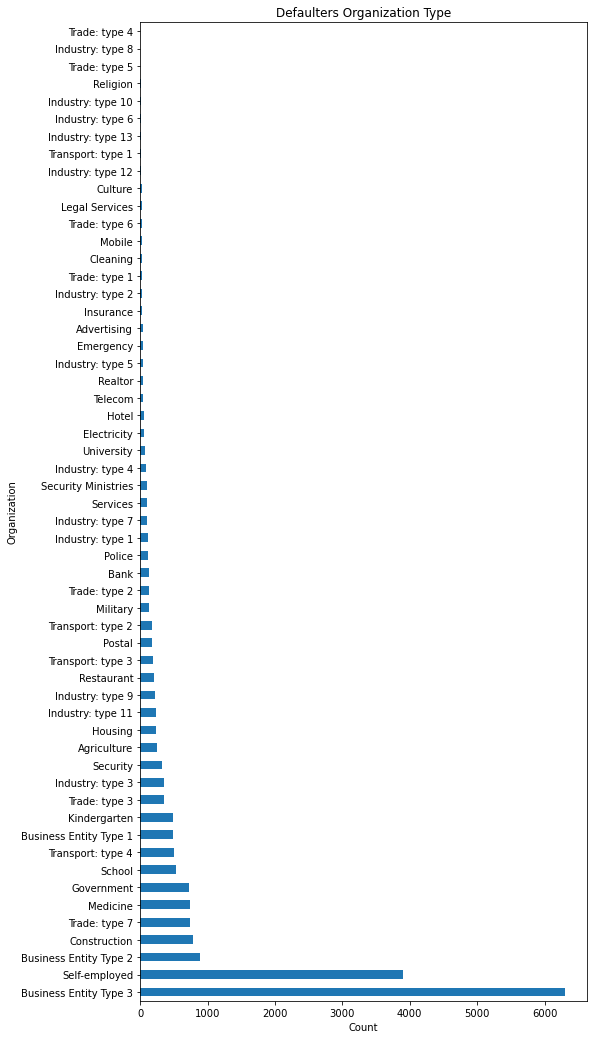

In [101]:
# plot for Defaulters
plt.figure(figsize=[8,18])
plt.title("Defaulters Organization Type")
app_1[~(app_1.ORGANIZATION_TYPE=='Others')].ORGANIZATION_TYPE.value_counts().plot.barh()
plt.ylabel("Organization")
plt.xlabel("Count")
plt.show()


- Majority of the **Defaulter** clients are engaged with Business Entity Type3 followed by Self-Employed. This may be due non-fixed monthly income as their income is erratic they might have missed some payments. 

**NAME_FAMILY_STATUS**

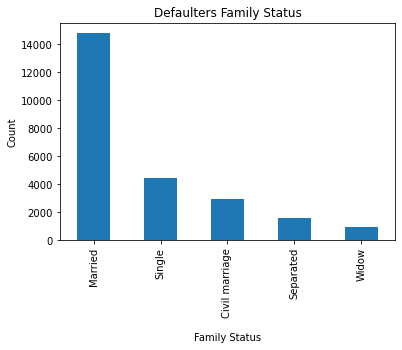

In [102]:
# family status of defaulter clients
app_1['NAME_FAMILY_STATUS'].value_counts().plot.bar()
plt.title('Defaulters Family Status')
plt.xlabel("\nFamily Status")
plt.ylabel("Count")
plt.show()

- Most of the defaulter clients are **married**. The family client may have other expenses to take care of which may lead to non-payment towards loan 

**FLAG_OWN_REALTY and FLAG_OWN_CAR**

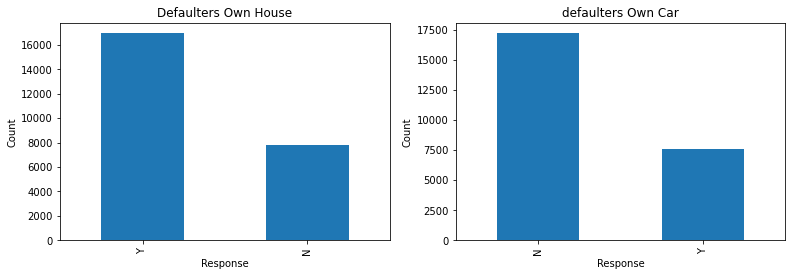

In [103]:
plt.figure(figsize=(13,4))

plt.subplot(1,2,1)
plt.title("Defaulters Own House")
app_1['FLAG_OWN_REALTY'].value_counts().plot.bar()
plt.xlabel("Response")
plt.ylabel("Count")

plt.subplot(1,2,2)
plt.title("defaulters Own Car")
app_1['FLAG_OWN_CAR'].value_counts().plot.bar()
plt.xlabel("Response")
plt.ylabel("Count")

plt.show()

- Majority of the defaulter own house but they dont own a car, may be because the house owner need to pay good amount on their emi.

### Continuous

**REGION_RATING_CLIENT**

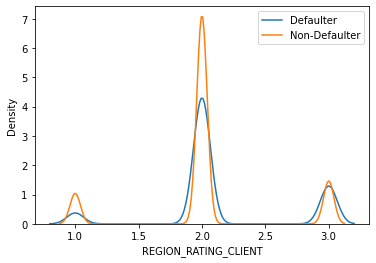

In [104]:
sns.distplot(app_1['REGION_RATING_CLIENT'],hist=False,label='Defaulter')
sns.distplot(app_0['REGION_RATING_CLIENT'],hist=False,label='Non-Defaulter')

plt.legend()
plt.show()

- Majority of clients living in Region_Rating of 2 are defaulters and most of the non-defaulters too live in the same region.

**AMT_INCOME_TOTAL**

In [105]:
# creating a separate bucket for AMT_INCOME_TOTAL
pd.cut(app_1.AMT_INCOME_TOTAL[:5], [0,100000,200000,300000,400000,500000,600000,999999999], labels=('<100K','100k-200k','200k-300k','300k-400k','400k-500k','500k-600k','600k+'))

0     200k-300k
26    100k-200k
40    200k-300k
42    100k-200k
81        <100K
Name: AMT_INCOME_TOTAL, dtype: category
Categories (7, object): ['<100K' < '100k-200k' < '200k-300k' < '300k-400k' < '400k-500k' < '500k-600k' < '600k+']

In [106]:
# Storing the groups into new column INCOME_TOTAL_GROUP
app_1['INCOME_TOTAL_GROUP'] = pd.cut(app_1.AMT_INCOME_TOTAL, [0,100000,200000,300000,400000,500000,600000,999999999], labels=('<100K','100k-200k','200-300k','300k-400k','400k-500k','500k-600k','600k+'))

In [107]:
app_0['INCOME_TOTAL_GROUP'] = pd.cut(app_0.AMT_INCOME_TOTAL, [0,100000,200000,300000,400000,500000,600000,999999999], labels=('<100K','100k-200k','200-300k','300k-400k','400k-500k','500k-600k','600k+'))

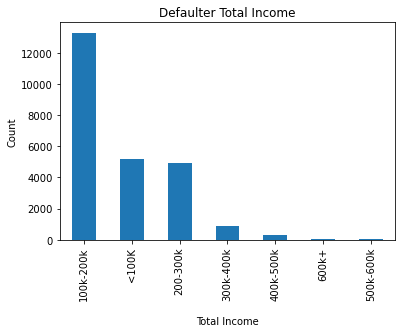

In [108]:
# plot
plt.title('Defaulter Total Income')
app_1['INCOME_TOTAL_GROUP'].value_counts().plot.bar()
plt.xlabel("\nTotal Income")
plt.ylabel("Count")

plt.show()

- Majority of the defaulter earn between the range of 100k-200k

**AGE**

In [109]:
# Grouping the AGE into age_group
pd.cut(app_1.AGE[:5], [0,20,30,40,50,60,999], labels=['<20','20-30','30-40','45-50','50-60','60+'] )

0     20-30
26    50-60
40    45-50
42    30-40
81      60+
Name: AGE, dtype: category
Categories (6, object): ['<20' < '20-30' < '30-40' < '45-50' < '50-60' < '60+']

In [110]:
app_1.AGE.head()

0     25
26    51
40    47
42    36
81    67
Name: AGE, dtype: int64

In [111]:
app_1['AGE_GROUP'] = pd.cut(app_1.AGE, [0,20,30,40,50,60,999], labels=['<20','20-30','30-40','45-50','50-60','60+'])

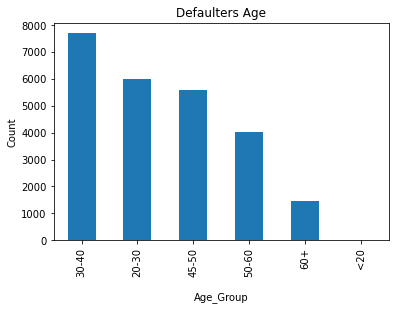

In [112]:
plt.title('Defaulters Age')
app_1['AGE_GROUP'].value_counts().plot.bar()
plt.xlabel('\nAge_Group')
plt.ylabel("Count")
plt.show()

- majority of the defaulter belong to age group 30-40

### Bivariate Analysis

####  Continous-Continous

**INCOME_TOTAL_GROUP vs AGE_GROUP**

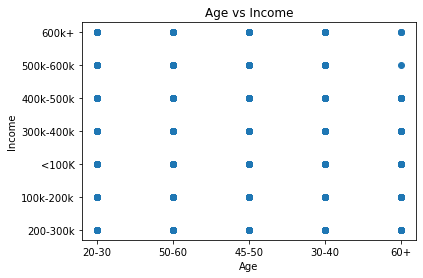

In [113]:
plt.scatter(app_1['AGE_GROUP'],  app_1['INCOME_TOTAL_GROUP'])
plt.title('Age vs Income')
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

- no pattern observed btween age_group and income_total of defaulters 

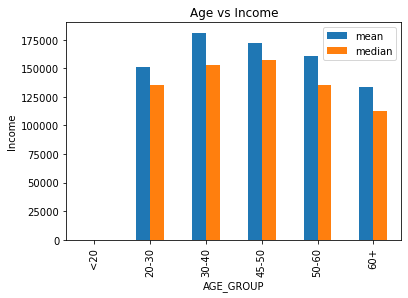

In [114]:
app_1.groupby('AGE_GROUP')['AMT_INCOME_TOTAL'].aggregate(['mean','median']).plot.bar()
plt.title('Age vs Income')
plt.ylabel('Income')
plt.show()

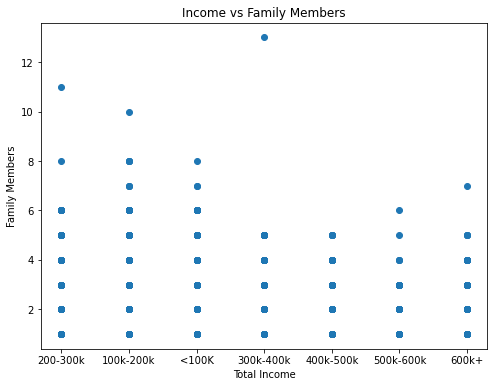

In [115]:
plt.figure(figsize=(8,6))
plt.title("Income vs Family Members")
plt.scatter(app_1['INCOME_TOTAL_GROUP'],  app_1['CNT_FAM_MEMBERS'])
plt.xlabel("Total Income")
plt.ylabel("Family Members")

plt.show()

**INCOME_TOTAL_GROUP vs AGE_GROUP vs CNT_FAM_MEMBERS**

<Figure size 576x720 with 0 Axes>

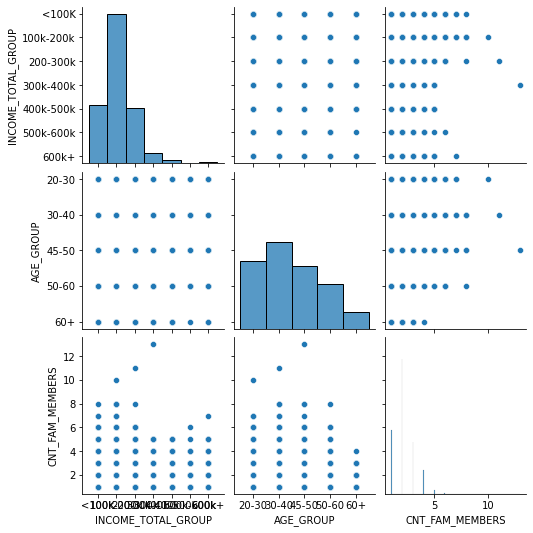

In [116]:
plt.figure(figsize=(8,10))
sns.pairplot(data=app_1, vars=['INCOME_TOTAL_GROUP','AGE_GROUP','CNT_FAM_MEMBERS'])
plt.show()

**correlation**

In [117]:
app_1[['AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AGE']].corr()
#inp1[['age','salary','balance']].corr()

,AMT_INCOME_TOTAL,CNT_FAM_MEMBERS,AGE
AMT_INCOME_TOTAL,1.000000,0.006669,-0.003120
CNT_FAM_MEMBERS,0.006669,1.000000,-0.203234
AGE,-0.003120,-0.203234,1.000000


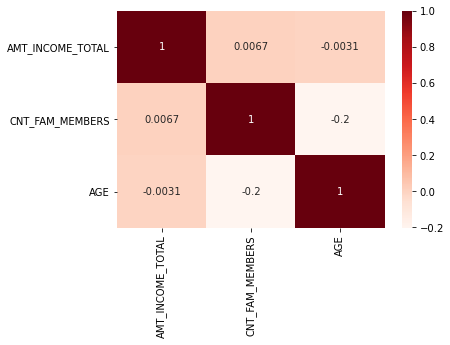

In [118]:
sns.heatmap(app_1[['AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AGE']].corr(), annot=True, cmap='Reds')
plt.show()

**INCOME_TOTAL_GROUP vs NAME_EDUCATION_TYPE vs OCCUPATION_TYPE**

<Figure size 3600x2160 with 0 Axes>

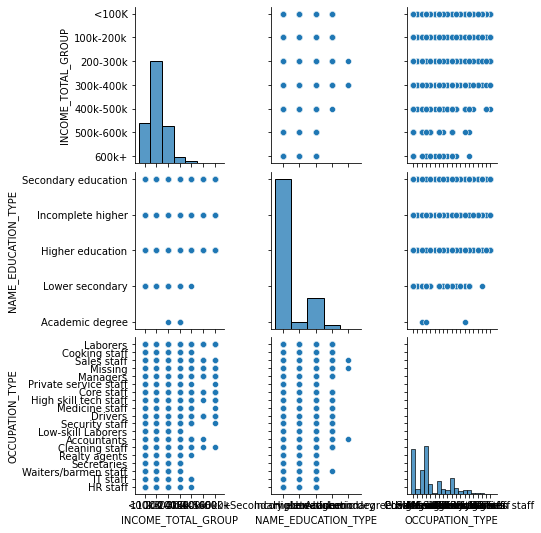

In [123]:
plt.figure(figsize=(50,30))
sns.pairplot(data=app_1, vars=['INCOME_TOTAL_GROUP','NAME_EDUCATION_TYPE','OCCUPATION_TYPE'])
plt.show()


**NAME_EDUCATION_TYPE vs OCCUPATION_TYPE**

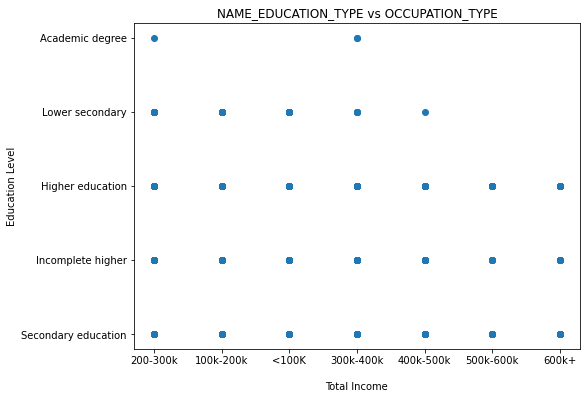

In [124]:
plt.figure(figsize=(8,6))
plt.title('NAME_EDUCATION_TYPE vs OCCUPATION_TYPE')
plt.scatter(app_1['INCOME_TOTAL_GROUP'],  app_1['NAME_EDUCATION_TYPE'])
plt.xlabel("\nTotal Income")
plt.ylabel("Education Level")
plt.show()

**.OCCUPATION_TYPE vs ORGANIZATION_TYPE**

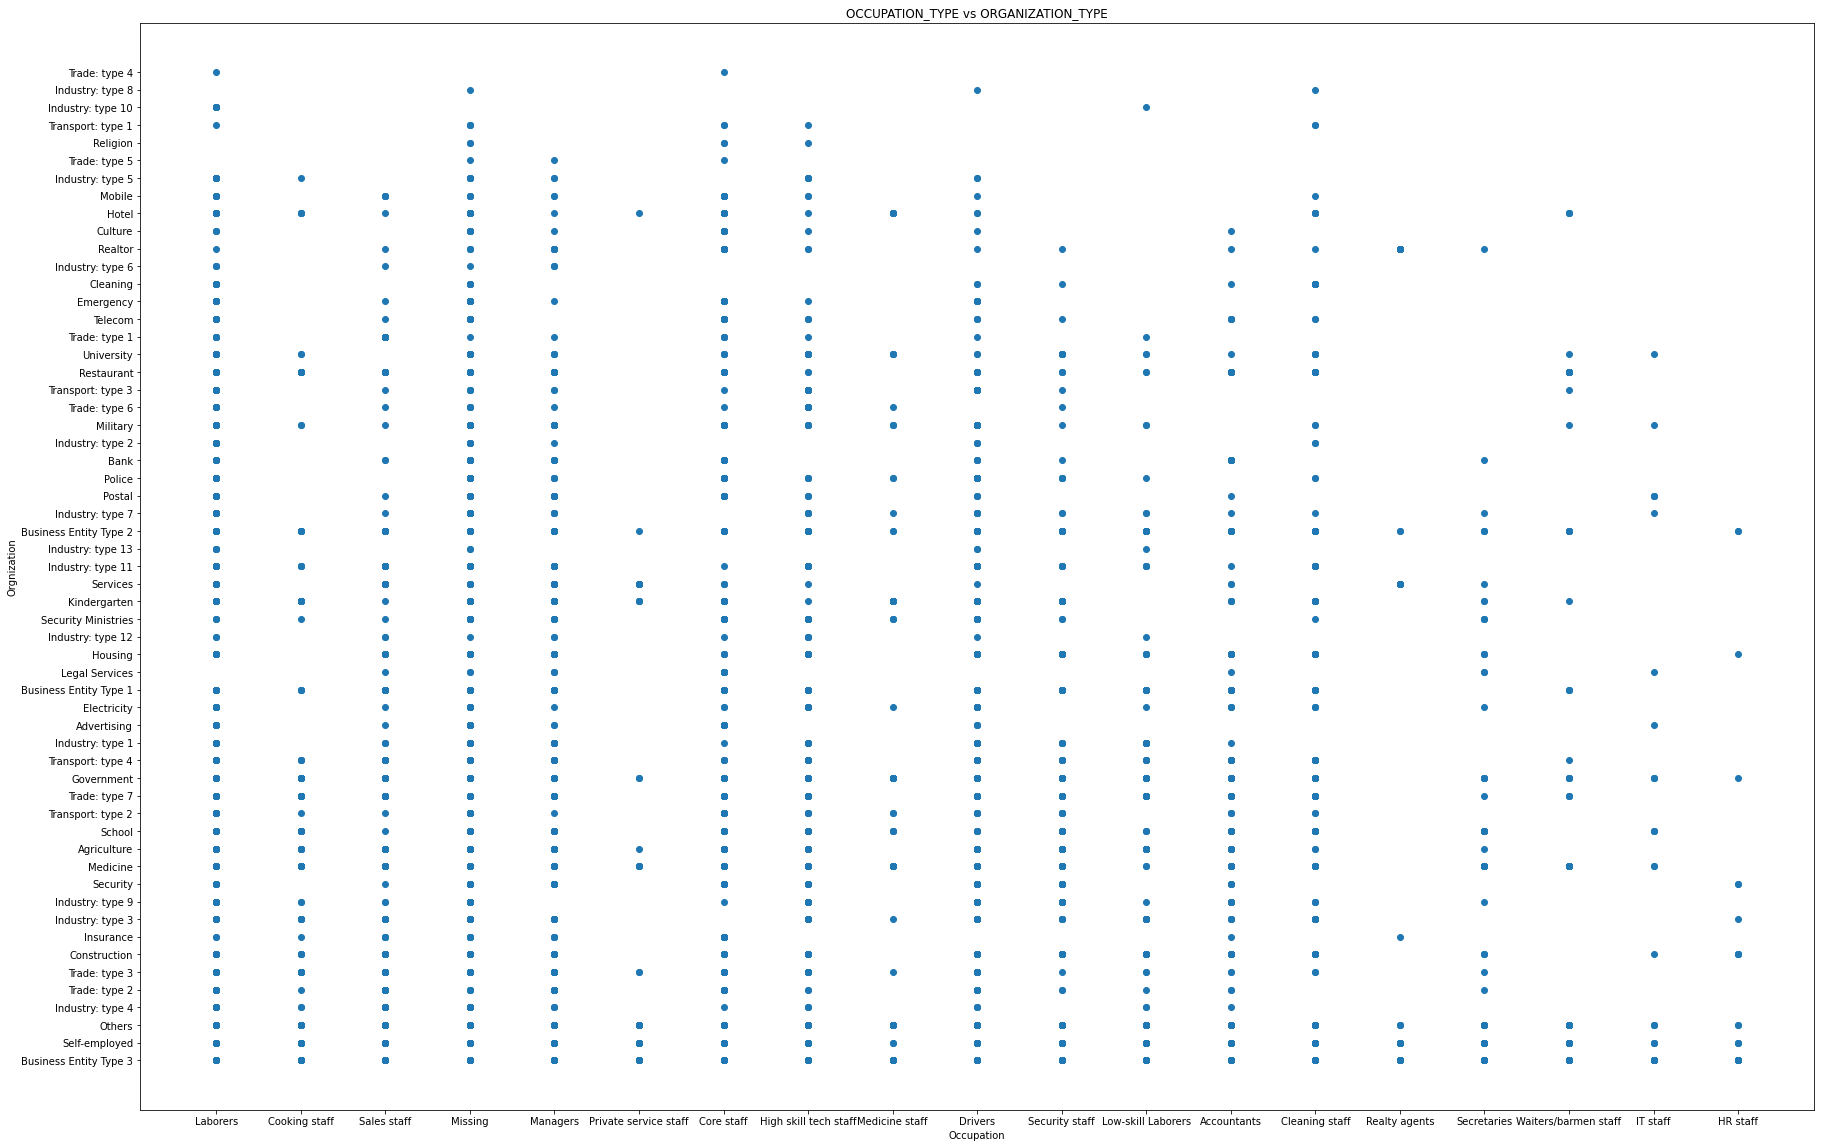

In [125]:
plt.figure(figsize=(30,20))
plt.title('OCCUPATION_TYPE vs ORGANIZATION_TYPE')
plt.scatter(app_1.OCCUPATION_TYPE,app_1.ORGANIZATION_TYPE)
plt.xlabel("Occupation")
plt.ylabel("Orgnization")
plt.show()

<h3 style=color:brown> Investigating previous_application </h3>

In [126]:
prev_app = pd.read_csv("previous_application.csv")

In [127]:
# reading the data
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [128]:
#info about the data
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

**Dimensions of data**

In [129]:
prev_app.shape

(1048575, 37)

**checking for duplicate data**

In [130]:
prev_app.duplicated().sum()

0

In [131]:
#Percentage of null values present for each column
(prev_app.isnull().sum())/1670214*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    13.950847
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               33.492475
AMT_GOODS_PRICE                14.427193
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              33.492475
RATE_INTEREST_PRIMARY          62.558091
RATE_INTEREST_PRIVILEGED       62.558091
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                30.842754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [132]:
# looking at the columns with more than 45% missing values

for i in prev_app.columns:
    if (round(100*(prev_app[i].isnull().sum()/len(prev_app.isnull())),2) >= 45):
        #lead.drop(i, axis=1, inplace=True)
        print(i,': ',(round(100*(prev_app[i].isnull().sum()/len(prev_app.isnull())),2)),'%')

AMT_DOWN_PAYMENT :  53.35 %
RATE_DOWN_PAYMENT :  53.35 %
RATE_INTEREST_PRIMARY :  99.65 %
RATE_INTEREST_PRIVILEGED :  99.65 %
NAME_TYPE_SUITE :  49.13 %


**dropping above and irrelevant columns**

In [133]:
prev_app.drop(['AMT_DOWN_PAYMENT','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT',
               'NFLAG_LAST_APPL_IN_DAY','DAYS_DECISION','NAME_TYPE_SUITE','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE',
               'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION','FLAG_LAST_APPL_PER_CONTRACT',
               'NFLAG_LAST_APPL_IN_DAY','RATE_DOWN_PAYMENT','DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
               'DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],
              axis=1, inplace=True)

In [134]:
# new dimensions
prev_app.shape

(1048575, 21)

In [135]:
# percentage of null values in each column
(prev_app.isnull().sum())/1670214*100

SK_ID_PREV                 0.000000
SK_ID_CURR                 0.000000
NAME_CONTRACT_TYPE         0.000000
AMT_ANNUITY               13.950847
AMT_APPLICATION            0.000000
AMT_CREDIT                 0.000000
AMT_GOODS_PRICE           14.427193
NAME_CASH_LOAN_PURPOSE     0.000000
NAME_CONTRACT_STATUS       0.000000
NAME_PAYMENT_TYPE          0.000000
CODE_REJECT_REASON         0.000000
NAME_CLIENT_TYPE           0.000000
NAME_GOODS_CATEGORY        0.000000
NAME_PORTFOLIO             0.000000
NAME_PRODUCT_TYPE          0.000000
CHANNEL_TYPE               0.000000
SELLERPLACE_AREA           0.000000
NAME_SELLER_INDUSTRY       0.000000
CNT_PAYMENT               13.950667
NAME_YIELD_GROUP           0.000000
PRODUCT_COMBINATION        0.013411
dtype: float64

### Data Cleaning

**AMT_ANNUITY column**

In [136]:
prev_app['AMT_ANNUITY'].isnull().sum()

233009

In [137]:
# dropping the null records as guessing could lead to wrong analysis
prev_app = prev_app[~prev_app['AMT_ANNUITY'].isnull()]

In [138]:
prev_app['AMT_ANNUITY'].isnull().sum()

0

**AMT_GOODS_PRICE column**

In [139]:
prev_app['AMT_GOODS_PRICE'].isnull().sum()

32278

In [140]:
#dropping the null records as guessing could lead to wrong analysis
prev_app = prev_app[~prev_app['AMT_GOODS_PRICE'].isnull()]

In [141]:
prev_app['AMT_GOODS_PRICE'].isnull().sum()

0

**CNT_PAYMEN column**

In [142]:
prev_app['CNT_PAYMENT'].isnull().sum()

0

**PRODUCT_COMBINATION column**

In [143]:
prev_app['PRODUCT_COMBINATION'].isnull().sum()

0

In [144]:
#looking fornull values
prev_app.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NAME_CONTRACT_TYPE        0
AMT_ANNUITY               0
AMT_APPLICATION           0
AMT_CREDIT                0
AMT_GOODS_PRICE           0
NAME_CASH_LOAN_PURPOSE    0
NAME_CONTRACT_STATUS      0
NAME_PAYMENT_TYPE         0
CODE_REJECT_REASON        0
NAME_CLIENT_TYPE          0
NAME_GOODS_CATEGORY       0
NAME_PORTFOLIO            0
NAME_PRODUCT_TYPE         0
CHANNEL_TYPE              0
SELLERPLACE_AREA          0
NAME_SELLER_INDUSTRY      0
CNT_PAYMENT               0
NAME_YIELD_GROUP          0
PRODUCT_COMBINATION       0
dtype: int64

### Fixing columns/Outliers

**NAME_CONTRACT_TYPE**

In [145]:
prev_app['NAME_CONTRACT_TYPE'].value_counts()

# No fixing required

Consumer loans     437122
Cash loans         287509
Revolving loans     58657
Name: NAME_CONTRACT_TYPE, dtype: int64

**NAME_CASH_LOAN_PURPOSE**

In [146]:
prev_app['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 495779
XNA                                 244333
Repairs                              14724
Other                                 9595
Urgent needs                          5304
Buying a used car                     1773
Building a house or an annex          1682
Everyday expenses                     1479
Medicine                              1396
Payments on other loans               1206
Education                              970
Journey                                743
Purchase of electronic equipment       639
Buying a new car                       633
Wedding / gift / holiday               589
Buying a home                          546
Car repairs                            493
Furniture                              475
Buying a holiday home / land           334
Business development                   253
Gasification / water supply            203
Buying a garage                         84
Hobby                                   31
Money for a

In [147]:
# replacing XNA,XAP with unknown for better understanding
prev_app['NAME_CASH_LOAN_PURPOSE'] = prev_app['NAME_CASH_LOAN_PURPOSE'].replace(['XNA','XAP'],'Unknown')

In [148]:
prev_app['NAME_CASH_LOAN_PURPOSE'].value_counts()

Unknown                             740112
Repairs                              14724
Other                                 9595
Urgent needs                          5304
Buying a used car                     1773
Building a house or an annex          1682
Everyday expenses                     1479
Medicine                              1396
Payments on other loans               1206
Education                              970
Journey                                743
Purchase of electronic equipment       639
Buying a new car                       633
Wedding / gift / holiday               589
Buying a home                          546
Car repairs                            493
Furniture                              475
Buying a holiday home / land           334
Business development                   253
Gasification / water supply            203
Buying a garage                         84
Hobby                                   31
Money for a third person                16
Refusal to 

**NAME_CONTRACT_STATUS column**

In [149]:
prev_app['NAME_CONTRACT_STATUS'].value_counts()

# no fixing required

Approved        625749
Refused         150891
Canceled          6067
Unused offer       581
Name: NAME_CONTRACT_STATUS, dtype: int64

**NAME_PAYMENT_TYPE**

In [150]:
prev_app['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        627374
XNA                                          150055
Non-cash from your account                     5190
Cashless from the account of the employer       669
Name: NAME_PAYMENT_TYPE, dtype: int64

In [151]:
# replacing XNA with unknown for better understanding
prev_app['NAME_PAYMENT_TYPE'] = prev_app['NAME_PAYMENT_TYPE'].replace('XNA','Unknown')

In [152]:
prev_app['NAME_PAYMENT_TYPE'].value_counts()

Cash through the bank                        627374
Unknown                                      150055
Non-cash from your account                     5190
Cashless from the account of the employer       669
Name: NAME_PAYMENT_TYPE, dtype: int64

**CODE_REJECT_REASON**

In [153]:
prev_app['CODE_REJECT_REASON'].value_counts()

XAP       631810
HC         88685
LIMIT      31664
SCO        21922
SCOFR       5108
VERIF       2081
XNA         1422
CLIENT       581
SYSTEM        15
Name: CODE_REJECT_REASON, dtype: int64

In [154]:
# Replacing XAP,XNA with Others for better understanding
prev_app['CODE_REJECT_REASON'] = prev_app['CODE_REJECT_REASON'].replace(['XAP','XNA'],'Others')

In [155]:
prev_app['CODE_REJECT_REASON'].value_counts()

Others    633232
HC         88685
LIMIT      31664
SCO        21922
SCOFR       5108
VERIF       2081
CLIENT       581
SYSTEM        15
Name: CODE_REJECT_REASON, dtype: int64

**NAME_CLIENT_TYPE**

In [156]:
prev_app['NAME_CLIENT_TYPE'].value_counts()

Repeater     529590
New          185614
Refreshed     67534
XNA             550
Name: NAME_CLIENT_TYPE, dtype: int64

In [157]:
# replacing XNA with others
prev_app['NAME_CLIENT_TYPE'] = prev_app['NAME_CLIENT_TYPE'].replace('XNA','Others')

In [158]:
prev_app['NAME_CLIENT_TYPE'].value_counts()

Repeater     529590
New          185614
Refreshed     67534
Others          550
Name: NAME_CLIENT_TYPE, dtype: int64

**NAME_PORTFOLIO**

In [159]:
prev_app['NAME_PORTFOLIO'].value_counts()

# No fixing required

POS      436843
Cash     287509
Cards     58657
Cars        279
Name: NAME_PORTFOLIO, dtype: int64

**CHANNEL_TYPE**

In [160]:
prev_app['CHANNEL_TYPE'].value_counts()

Country-wide                  283007
Credit and cash offices       247497
Stone                         131403
Regional / Local               66993
AP+ (Cash loan)                29831
Contact center                 20410
Channel of corporate sales      3852
Car dealer                       295
Name: CHANNEL_TYPE, dtype: int64

**NAME_YIELD_GROUP**

In [161]:
prev_app['NAME_YIELD_GROUP'].value_counts()

middle        242327
high          221898
low_normal    202206
XNA            58657
low_action     58200
Name: NAME_YIELD_GROUP, dtype: int64

In [162]:
# replacing XNA with unknown
prev_app['NAME_YIELD_GROUP'] = prev_app['NAME_YIELD_GROUP'].replace('XNA','unknown')

## Univariate Analysis

In [163]:
# merging defaulter client (app_1) with previous_application data
inp1 = pd.merge(left=app_1,right=prev_app, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
inp1.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest
1,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Refreshed,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,24.0,high,Cash X-Sell: high
3,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1.0,XNA,36.0,low_normal,Cash Street: low
4,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,New,Photo / Cinema Equipment,POS,XNA,Country-wide,27.0,Connectivity,10.0,low_normal,POS mobile with interest


In [164]:
# merging non-defaulter client (app_0) with previous_application data
inp2 = pd.merge(left=app_0,right=prev_app, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')


**NAME_CASH_LOAN_PURPOSE**

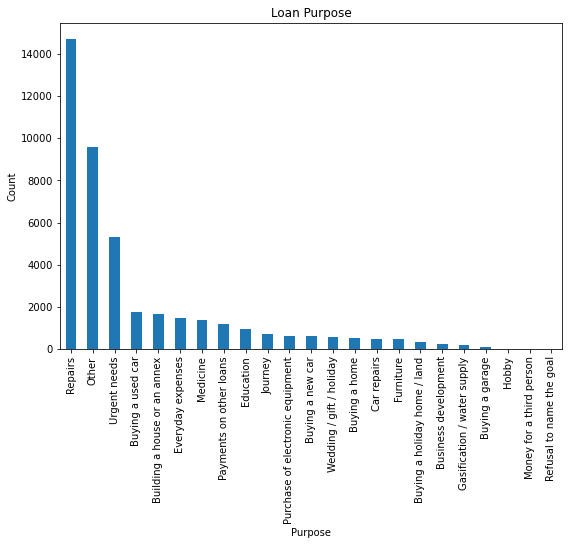

In [165]:
plt.figure(figsize=(9,6))
prev_app[~(prev_app.NAME_CASH_LOAN_PURPOSE=='Unknown')].NAME_CASH_LOAN_PURPOSE.value_counts().plot.bar()
plt.title("Loan Purpose")
plt.xlabel("Purpose")
plt.ylabel("Count")
plt.show()

- Most of the loans has been taken for Repairs work

**NAME_CONTRACT_TYPE**

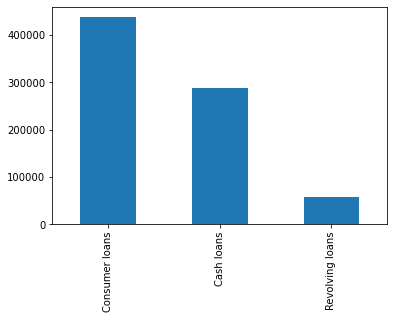

In [166]:
prev_app['NAME_CONTRACT_TYPE'].value_counts().plot.bar()
plt.show()

- majority of people opted for Consumer loans

**CODE_REJECT_REASON**

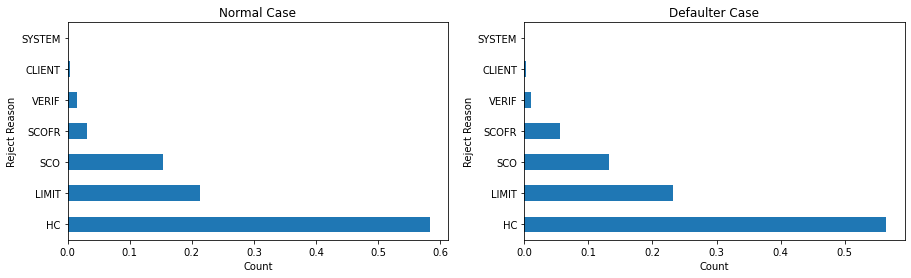

In [167]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("Normal Case")
plt.xlabel("Count")
plt.ylabel("Reject Reason")
inp2[~(inp2.CODE_REJECT_REASON=='Others')].CODE_REJECT_REASON.value_counts(normalize=True).plot.barh()

plt.subplot(1,2,2)
plt.title("Defaulter Case")
plt.xlabel("Count")
plt.ylabel("Reject Reason")
inp1[~(inp1.CODE_REJECT_REASON=='Others')].CODE_REJECT_REASON.value_counts(normalize=True).plot.barh()

plt.show()

- Majority of the loans are rejected due to HC and majority of the defaulters also belong to that group

**NAME_CLIENT_TYPE**

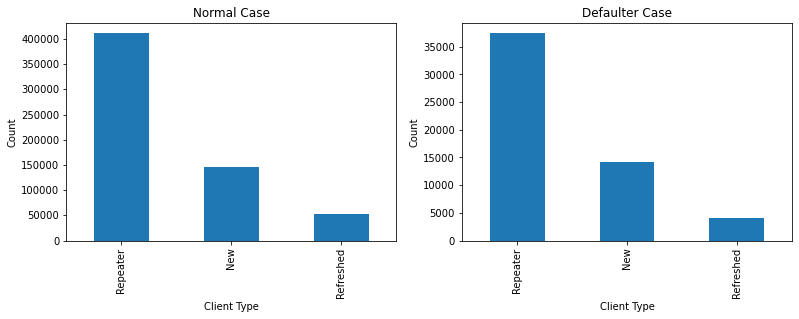

In [168]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.title("Normal Case")
plt.xlabel("Client Type")
plt.ylabel("Count")
inp2[~(inp2.NAME_CLIENT_TYPE=='Others')].NAME_CLIENT_TYPE.value_counts().plot.bar()

plt.subplot(1,2,2)
plt.title("Defaulter Case")
plt.xlabel("Client Type")
plt.ylabel("Count")
inp1[~(inp1.NAME_CLIENT_TYPE=='Others')].NAME_CLIENT_TYPE.value_counts().plot.bar()

plt.show()

- majority of the clients who apply for the loan are repeater but they are also highest defaulter.

**NAME_PORTFOLIO**

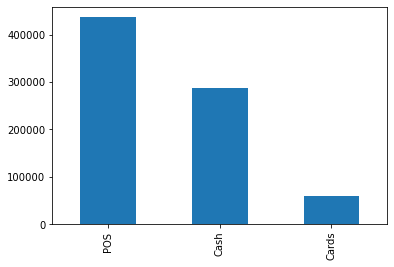

In [169]:
prev_app[~(prev_app.NAME_PORTFOLIO=='Cars')].NAME_PORTFOLIO.value_counts().plot.bar()
plt.show()

- Majority of portfolio is POS

**NAME_YIELD_GROUP**

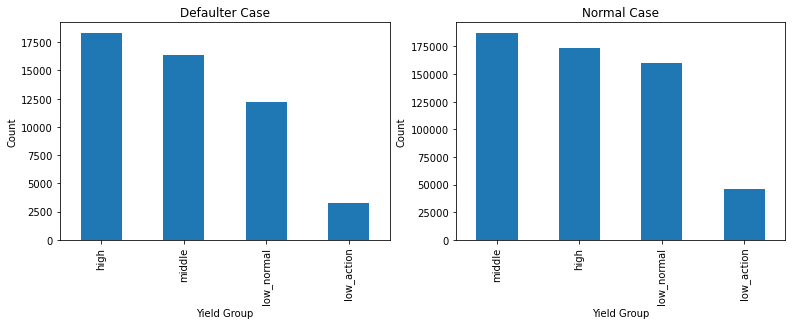

In [170]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
plt.title("Defaulter Case")
plt.xlabel("Yield Group")
plt.ylabel("Count")
inp1[~(inp1['NAME_YIELD_GROUP']=='unknown')].NAME_YIELD_GROUP.value_counts().plot.bar()

plt.subplot(1,2,2)
inp2[~(inp2['NAME_YIELD_GROUP']=='unknown')].NAME_YIELD_GROUP.value_counts().plot.bar()
plt.title("Normal Case")
plt.xlabel("Yield Group")
plt.ylabel("Count")
plt.show()

- majority of the interest rate on which client take credit lies in middle category whereas many clients who defaults are from high interest rate category.

___
## Summary and Possible factors

- The maximum number of clients who have `defaulted` had `Secondary education` followed by Higher education. May be clients with `Secondary education are paid low`. 

- Majority of the clients `defaulted` are `Labourers by profession` followed by Sales staff, least people belong to HR, may be HR employees are paid higher compared to other occupations.

- majority of `defaulted clients opt/apply for cash loans`.

- Majority of the `Defaulter clients are engaged with Business Entity Type3` followed by Self-Employed. This may be due non-fixed monthly income as their income is erratic they might have missed some payments. 

- Most of the `defaulter clients are **married**`. The family client may have other expenses to take care of which may lead to non-payment towards loan 

- Majority of the `defaulter own house` but they dont own a car, may be because the house owner need to pay good amount on their emi.

- Majority of clients `living in Region_Rating of 2 are defaulters` and most of the non-defaulters too live in the same region.

- Majority of the `defaulter earn between the range of 100k-200k`.

- Majority of the `defaulter belong to age group 30-40`.

- Most of the loans has been taken for Repairs work

- Majority of the loans are rejected due to HC and majority of the defaulters also belong to that group

- Majority of the `clients` who apply for the loan are `repeater` but they are also `highest defaulter`.

- Majority of the interest rate on which client take credit lies in middle category whereas many `clients who defaults are from high interest rate category`.
___

### Major factors (red flags) to keep in mind


    - Education      --> Secondary Education
    - Profession     --> Labourers
    - Age group      --> 30-40
    - Earning        --> Between 100k-200k
    - Loan Type      --> Cash Loan
    - Business       --> Entity type 3
    - Marital Status --> Married
    - Liabilities    --> Own House, car and family responsibility
    - Region_Rating  --> living in region_rating of 2
    - Client Type    --> Repeater
___


                                                  **THE END** 